In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NA
import os
from pathlib import Path
project_dir = Path.home().joinpath('Desktop\Git\Test\pydata-book-2nd-edition')
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
string_data = pd.Series(['aaaaa','bbbbb',np.nan,'ccccc'])
string_data

0    aaaaa
1    bbbbb
2      NaN
3    ccccc
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [4]:
string_data[0] = None

In [5]:
string_data

0     None
1    bbbbb
2      NaN
3    ccccc
dtype: object

In [6]:
data = pd.Series([1,np.nan,2,NA,7])
data[data.notnull()]

0    1.0
2    2.0
4    7.0
dtype: float64

In [7]:
data = pd.DataFrame([[1,2,3],[1,NA,NA],[NA,NA,NA],[NA,6,3]])
data

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [8]:
data.dropna(how='any',axis=1)

""
0
1
2
3


In [9]:
df = pd.DataFrame(np.random.randn(7,3), columns = ('a','b','c'))
df.iloc[:4,1] = NA
df.iloc[:2,2] = NA
df

,a,b,c
0,-1.954924,NaN,NaN
1,1.359844,NaN,NaN
2,-0.000733,NaN,0.098010
3,-0.065572,NaN,-1.250628
4,-0.271351,0.051542,-0.728801
5,-1.264870,0.185739,2.199981
6,1.384562,0.204095,-1.020183


In [10]:
df.fillna({'a':123,'b':456,'c' : 789}, inplace=True)
df

,a,b,c
0,-1.954924,456.000000,789.000000
1,1.359844,456.000000,789.000000
2,-0.000733,456.000000,0.098010
3,-0.065572,456.000000,-1.250628
4,-0.271351,0.051542,-0.728801
5,-1.264870,0.185739,2.199981
6,1.384562,0.204095,-1.020183


In [11]:
df =pd.DataFrame(np.random.randn(6,3),columns = ('a','b','c'))
df

,a,b,c
0,-0.838023,0.099765,-0.211596
1,0.127792,-0.192843,-1.318372
2,-0.511983,-0.173048,-1.628210
3,-0.451062,0.753913,-0.948053
4,1.799009,-1.041175,-0.254946
5,1.713416,-0.023819,1.044695


In [12]:
df.iloc[2:4,1] = NA
df.iloc[4,2] = NA
df

,a,b,c
0,-0.838023,0.099765,-0.211596
1,0.127792,-0.192843,-1.318372
2,-0.511983,NaN,-1.628210
3,-0.451062,NaN,-0.948053
4,1.799009,-1.041175,NaN
5,1.713416,-0.023819,1.044695


In [13]:
df.fillna(df.mean())

,a,b,c
0,-0.838023,0.099765,-0.211596
1,0.127792,-0.192843,-1.318372
2,-0.511983,-0.289518,-1.628210
3,-0.451062,-0.289518,-0.948053
4,1.799009,-1.041175,-0.612307
5,1.713416,-0.023819,1.044695


In [14]:
data = pd.DataFrame({'k1':['one','two'] * 3 + ['two'],
'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [15]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [16]:
data = pd.Series(np.random.randn(9),
index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
[1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1   -0.271527
   2   -0.714887
   3   -0.833598
b  1    0.836086
   3   -0.690604
c  1    1.434750
   2    0.167540
d  2   -0.117012
   3   -0.672754
dtype: float64

In [17]:
data.unstack()

,1,2,3
a,-0.271527,-0.714887,-0.833598
b,0.836086,NaN,-0.690604
c,1.434750,0.167540,NaN
d,NaN,-0.117012,-0.672754


In [18]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
 'data2': range(3)})
 

In [19]:
pd.merge(df1,df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [20]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [21]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [22]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
index=pd.Index(['Ohio', 'Colorado'], name='state'),
columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [23]:
data.unstack()

number  state   
one     Ohio        0
        Colorado    3
two     Ohio        1
        Colorado    4
three   Ohio        2
        Colorado    5
dtype: int32

In [24]:
data.stack()

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [25]:
os.getcwd()

'c:\\Users\\kienn\\Desktop\\Git\\Test'

In [26]:
data = pd.read_csv(project_dir.joinpath('examples/macrodata.csv'))
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [27]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name ='date')
columns = pd.Index(['realgdp', 'infl','unemp'],name = 'item')
data = data.reindex(columns = columns)

In [28]:
data.index = periods.to_timestamp('D')
data

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2
...,...,...,...
2008-07-01,13324.600,-3.16,6.0
2008-10-01,13141.920,-8.79,6.9
2009-01-01,12925.410,0.94,8.1


In [29]:
ldata = data.stack().reset_index().rename(columns ={0:'value'})
ldata

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
...,...,...,...
604,2009-04-01,infl,3.370
605,2009-04-01,unemp,9.200
606,2009-07-01,realgdp,12990.341
607,2009-07-01,infl,3.560


In [30]:
pivoted = ldata.pivot('date','item')
pivoted

value                 
item        infl    realgdp unemp
date                             
1959-01-01  0.00   2710.349   5.8
1959-04-01  2.34   2778.801   5.1
1959-07-01  2.74   2775.488   5.3
1959-10-01  0.27   2785.204   5.6
1960-01-01  2.31   2847.699   5.2
...          ...        ...   ...
2008-07-01 -3.16  13324.600   6.0
2008-10-01 -8.79  13141.920   6.9
2009-01-01  0.94  12925.410   8.1
2009-04-01  3.37  12901.504   9.2
2009-07-01  3.56  12990.341   9.6

[203 rows x 3 columns]

In [31]:
pivoted = pivoted.reset_index()


In [32]:
orginal = pd.melt(pivoted,value_vars=['infl','realgdp','unemp'])

C:\Users\kienn\AppData\Local\Temp\ipykernel_10264\4189031294.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  orginal = pd.melt(pivoted,value_vars=['infl','realgdp','unemp'])


In [33]:
original

NameError: name 'original' is not defined

In [ ]:
df = pd.DataFrame({'key':['foo','bar','baz'],
'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [ ]:
melted = pd.melt(df,['key'])
melted

In [ ]:
reshape = melted.pivot('key','variable')
reshape.reset_index()

key value      
variable          A  B  C
0         bar     2  5  8
1         baz     3  6  9
2         foo     1  4  7

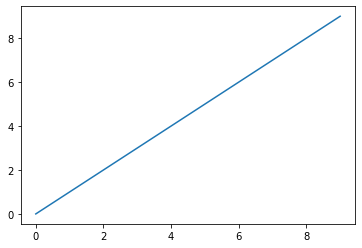

In [ ]:
import matplotlib.pyplot as plt
data = np.arange(10)
plt.plot(data)

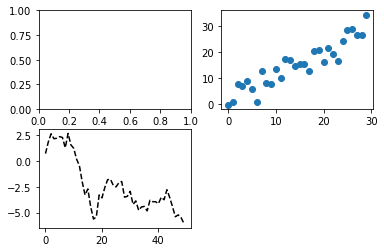

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30)+ 3 * np.random.randn(30))


<AxesSubplot:>

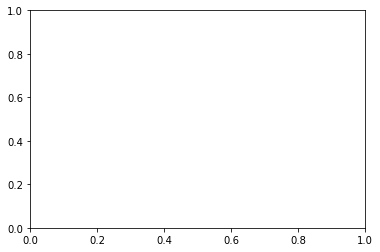

In [ ]:
fig,axes = plt.subplots()
axes

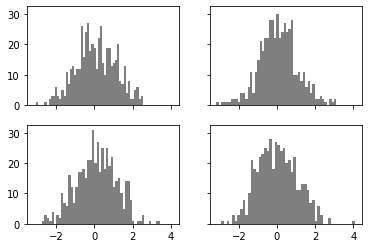

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

<AxesSubplot:>

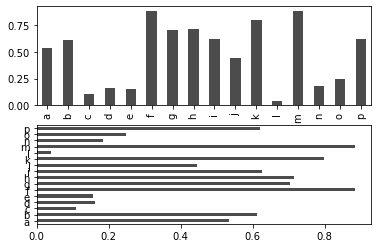

In [ ]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color = 'k', alpha = 0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
index=['one', 'two', 'three', 'four', 'five', 'six'],
columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.398163,0.166393,0.593034,0.219885
two,0.650779,0.397781,0.074442,0.298301
three,0.225990,0.852045,0.924825,0.099057
four,0.747655,0.758675,0.894155,0.788651
five,0.752414,0.298858,0.821937,0.316076
six,0.184085,0.779194,0.929072,0.812105


<AxesSubplot:>

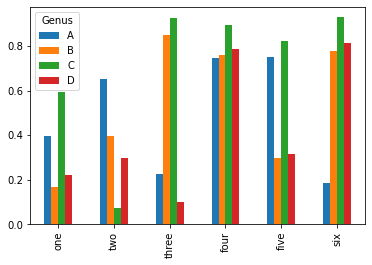

In [ ]:
df.plot.bar()

<AxesSubplot:>

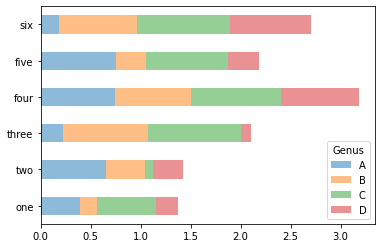

In [ ]:
df.plot.barh(stacked = True,alpha = 0.5)

In [ ]:
tips = pd.read_csv(project_dir.joinpath('examples/tips.csv'))
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


day,Fri,Sat,Sun,Thur
size,,,,
1,1,2,0,1
2,16,53,39,48
3,1,18,15,4
4,1,13,18,5
5,0,1,3,1
6,0,0,1,3


In [ ]:
arr = np.array([8, 2, 1, 7, 4, 3, 9]) 
np.sort(arr)

array([1, 2, 3, 4, 7, 8, 9])

In [ ]:
np.argsort(arr)

array([2, 1, 5, 4, 3, 0, 6], dtype=int64)

In [ ]:
np.zeros(5,dtype = int)

array([0, 0, 0, 0, 0])

In [ ]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
np.full((3,3),200)

array([[200, 200, 200],
       [200, 200, 200],
       [200, 200, 200]])

In [ ]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [ ]:
a1 = np.random.randint(10, size=5) # Mảng 1 chiều
a2 = np.random.randint(10, size=(3, 4)) # Mảng 2 chiều
a3 = np.random.randint(10, size=(3, 4, 5)) # Mảng 3 chiều
a3

array([[[8, 8, 1, 5, 7],
        [1, 4, 5, 1, 5],
        [3, 3, 7, 4, 5],
        [6, 9, 1, 6, 3]],

       [[7, 4, 9, 4, 7],
        [2, 9, 0, 3, 9],
        [2, 6, 7, 8, 0],
        [4, 6, 0, 6, 6]],

       [[0, 0, 9, 5, 4],
        [5, 9, 9, 7, 6],
        [8, 2, 1, 4, 1],
        [9, 9, 1, 8, 4]]])

In [ ]:
x 

array([[6, 2, 6, 0],
       [5, 9, 8, 6],
       [7, 3, 0, 7]])

In [ ]:
a3[2,2,3]

4

In [ ]:

np.log(8)


2.0794415416798357

In [ ]:
np.log10(x)

3.0

In [ ]:
x = np.arange(100)

In [ ]:
a = np.arange(3)
a

array([0, 1, 2])

In [ ]:
x = [1,2,3,4,5]
np.mean(x)

3.0

In [34]:
df = pd.DataFrame({
    'key1':['a','a','b','b','a'],
    'key2':['one','two','one','two','one'],
    'data1': np.random.randn(5),
    'data2': np.random.randn(5)
})
df

,key1,key2,data1,data2
0,a,one,-0.518737,0.185105
1,a,two,-0.632957,0.084219
2,b,one,0.448618,-1.340045
3,b,two,-0.972566,0.148732
4,a,one,-0.693113,-1.579369


In [35]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [36]:
grouped.mean()

key1
a   -0.614936
b   -0.261974
Name: data1, dtype: float64